## Introduction

In this report I will aim to discover some hidden insights in data provided by Walmart. Some potential questions retail stores might ask about are highest performing stores and months. Busiest periods for sales in store. As well as how temperature has affected purchasing decisions. This dataset also has a fuel price and CPI (Customer price index). Although no obvious observations can be made using these two currently, I aim to use these two columns to hopefully provide some meaninful data to the proposed stakeholder.

## Table of contents

## Glossary

<p><span style="font-weight: bold">Store: </span>..</p>
<p><span style="font-weight: bold">Date: </span>..</p>
<p><span style="font-weight: bold">Weekly_Sales: </span>..</p>
<p><span style="font-weight: bold">Holiday_Flag: </span>..</p>
<p><span style="font-weight: bold">Temperature: </span>..</p>
<p><span style="font-weight: bold">Fuel_Price: </span>..</p>
<p><span style="font-weight: bold">CPI: </span>..</p>
<p><span style="font-weight: bold">Unemployment: </span>..</p>

In [2]:
import pandas as pd
import os
import datetime

Importing required libraries needed for the immediate analysis

In [3]:
all_data = pd.read_csv("archive/Walmart.csv")
all_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Adding a month column so we can find out the busiest month, it will likely be December given the state of holidays in America. However, we can dig deeper after we find do some initial digging.

In [4]:
all_data['Date'] = pd.to_datetime(all_data['Date'], dayfirst=True)
all_data['Month'] = all_data['Date'].dt.month
all_data['Week'] = all_data['Date'].dt.isocalendar().week

# all_data = all_data.drop(columns='Hour')

In [83]:
all_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,9


In [6]:
import matplotlib.pyplot as plt

Importing matplotlib since we will need it soon. Lets groupby sales first and find out some more information from the data.

## Question 1: Which store had had the highest sales?

It appears that store 14 had the highest weekly sales.

In [120]:
temp = all_data.groupby('Store').mean()
weekly_sales_asc = temp.sort_values('Weekly_Sales', ascending=True)
weekly_sales_asc = weekly_sales_asc.reset_index(drop=False)

In [121]:
weekly_sales_asc.tail(50)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Week
0,33,2.598617e+05,0.06993,76.728182,3.575923,128.679669,8.533154,6.447552,25.818182
1,44,3.027489e+05,0.06993,53.697133,3.286147,128.679669,6.735622,6.447552,25.818182
2,5,3.180118e+05,0.06993,69.410140,3.219699,216.565581,6.295406,6.447552,25.818182
3,36,3.735120e+05,0.06993,71.160350,3.204203,214.729069,7.869049,6.447552,25.818182
4,38,3.857317e+05,0.06993,70.262797,3.606420,128.679669,13.116483,6.447552,25.818182
5,3,4.027044e+05,0.06993,71.434196,3.219699,219.391531,7.176986,6.447552,25.818182
6,30,4.385796e+05,0.06993,68.847622,3.219699,215.646311,7.623846,6.447552,25.818182
7,37,5.189003e+05,0.06993,71.160350,3.219699,214.729069,7.869049,6.447552,25.818182
8,16,5.192477e+05,0.06993,45.030070,3.241559,193.664243,6.477993,6.447552,25.818182
9,29,5.394514e+05,0.06993,54.897133,3.441741,135.092607,9.806385,6.447552,25.818182


In [122]:
import seaborn as sns

[Text(0.5, 0, 'Store Number'), Text(0, 0.5, 'Total Sales')]

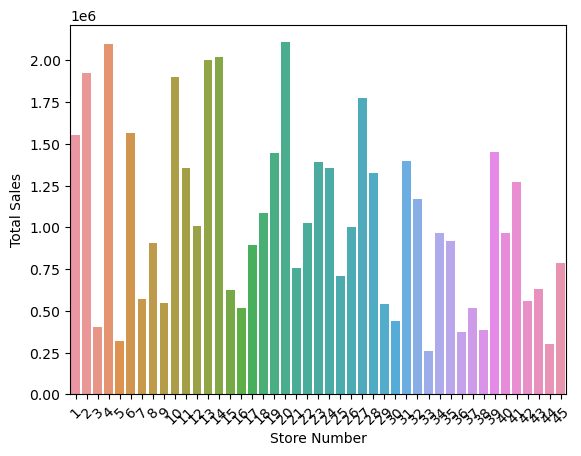

In [123]:
ax = sns.barplot(x=weekly_sales_asc['Store'], y=weekly_sales_asc['Weekly_Sales'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set(xlabel='Store Number', ylabel='Total Sales')

We can see here that the highest average sales was done by store 20. But this does not actually tell us much about why or what that could mean for us. I think we could probably take a look at temperature, unemployment, CPI and fuel prices to determine whether these factors have any sort of effect on the Total sales. 

In [172]:
temperature_df = all_data.groupby('Temperature', 'Store').mean()
temperature_df = temperature_df.reset_index(drop=False)
temperature_df['Average_Temp'] = temperature_df['Temperature']
temperature_df['Store'] = all_data['Store']
temperature_df.groupby('Store').max()

ValueError: No axis named Store for object type DataFrame